# Baseline 
Pour une baseline naïve, nous pourrions deviner la même valeur pour tous les exemples de l'ensemble de test. On nous demande de prédire la probabilité de ne pas rembourser le prêt, donc si nous sommes totalement incertains, nous devinerions 0,5 pour toutes les observations de l'ensemble de test. Cela nous donnera une zone caractéristique de fonctionnement du récepteur sous la courbe (AUC ROC) de 0,5 dans la compétition ([une classification aléatoire obtiendra un 0,5](https://stats.stackexchange.com/questions/266387/can-auc-roc-be-between-0-0-5)).

Puisque nous savons déjà quel score nous allons obtenir, nous n’avons pas vraiment besoin de faire une estimation naïve. Utilisons un modèle légèrement plus sophistiqué pour notre référence actuelle : la régression logistique.
Nous commencerons par analyse quelles sont les paramètres les plus adaptés à notre régression logistique puis nous les appliquerons à notre modèle.

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('X_train_CSV.csv')
X_test = pd.read_csv('X_test_CSV.csv')
y_train = pd.read_csv('y_train_CSV.csv')
y_test = pd.read_csv('y_test_CSV.csv')

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
logistic_model = LogisticRegression(C= 1, penalty='l1', solver='liblinear')
logistic_model.fit(X_train_scaled, y_train)

/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [5]:
values_predicted = logistic_model.predict(X_test_scaled)

In [8]:
from sklearn import metrics
print("RMSE : %.2f" % np.sqrt(metrics.mean_squared_error(y_test, values_predicted)))

RMSE : 0.54


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, values_predicted)
auc_score = roc_auc_score(y_test, values_predicted)
auc_score

0.6912667111227685

#### KNN

In [15]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [16]:
X_train = pd.read_csv('X_train_CSV.csv')
X_test = pd.read_csv('X_test_CSV.csv')
y_train = pd.read_csv('y_train_CSV.csv')
y_test = pd.read_csv('y_test_CSV.csv')

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1

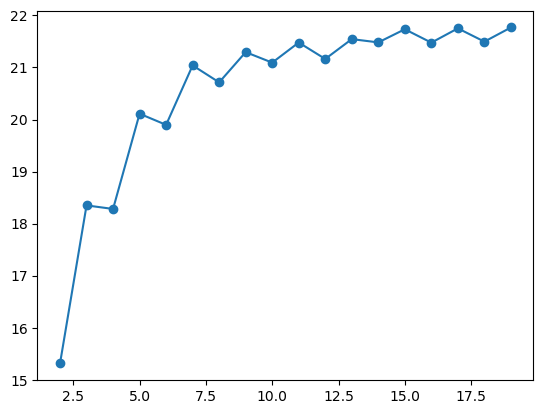

In [18]:
errors = []
for k in range(2,20):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))
plt.plot(range(2,20), errors, 'o-')
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='euclidean')
classifier.fit(X_train_scaled, y_train)

/Users/gaeldelescluse/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [20]:
values_predicted = classifier.predict(X_test_scaled)

In [21]:
from sklearn import metrics
print("RMSE : %.2f" % np.sqrt(metrics.mean_squared_error(y_test, values_predicted)))

RMSE : 0.39


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, values_predicted)
auc_score = roc_auc_score(y_test, values_predicted)
auc_score

0.836986878678571

## Forêt aléatoire

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler